# Group Name: PPG
## Group Members: 
- Asis, Alleona Divine M.
- Samson, Kaye V.
- Valenzuela, Johannabel DC.

# Importing Libraries

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Data Loading

In [7]:
train_data = pd.read_csv("/kaggle/input/ppg-act5-datasets/TrainingData.csv", encoding='ISO-8859-1')
test_data = pd.read_csv("/kaggle/input/ppg-act5-datasets/TestData.csv", encoding='ISO-8859-1')

## Check if Dataset has been loaded properly

In [8]:
print("Training Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Training Data:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Test Data:
                                             message
0  That depends. How would you like to be treated...
1                       Right on brah, see you later
2  Waiting in e car 4 my mum lor. U leh? Reach ho...
3  Your 2004 account for 07XXXXXXXXX shows 786 un...
4  Do you want a new video handset? 750 anytime a...


# Data Preprocessing for Training Data

In [9]:
# Use CountVectorizer or any other text preprocessing library to convert the email messages into numerical features.
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(train_data["message"])
X_test = vectorizer.transform(test_data["message"])

y_train = train_data["label"]

# Implementation

In [10]:
# Split the data into training and testing sets.
X = train_data['message']
y = train_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Implement a Naive Bayes classifier to train the model on the dataset.
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [12]:
# Evaluate the model using accuracy metrics and classification reports using your formula.
y_pred = classifier.predict(X_test_vec)

# Accuracy and the classification report
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_output)

Accuracy: 0.9846153846153847

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1027
        spam       0.96      0.92      0.94       143

    accuracy                           0.98      1170
   macro avg       0.97      0.96      0.96      1170
weighted avg       0.98      0.98      0.98      1170



# Visualization

(-0.5, 399.5, 199.5, -0.5)

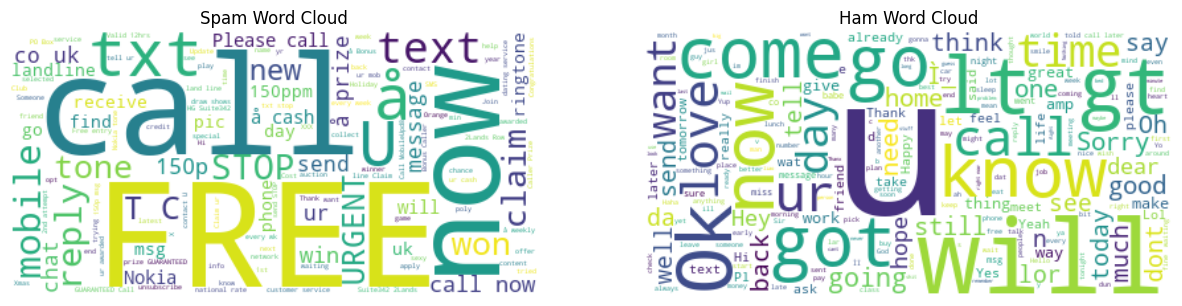

In [16]:
train_data["label"] = train_data["label"].str.strip().str.lower()

spam_messages = train_data[train_data["label"] == "spam"]["message"].tolist()
ham_messages = train_data[train_data["label"] == "ham"]["message"].tolist()

spam_cloud = WordCloud(width=400, height=200, background_color="white").generate(" ".join(spam_messages))
ham_cloud = WordCloud(width=400, height=200, background_color="white").generate(" ".join(ham_messages))

# Display
plt.figure(figsize=(15, 15))

# Spam word cloud
plt.subplot(1, 2, 1)
plt.imshow(spam_cloud, interpolation="bilinear")
plt.title("Spam Word Cloud")
plt.axis("off")

# Ham word cloud
plt.subplot(1, 2, 2)
plt.imshow(ham_cloud, interpolation="bilinear")
plt.title("Ham Word Cloud")
plt.axis("off")

# Predictions

In [14]:
# Test the model with new email messages (e.g., "Win a free prize now!" or "Meeting tomorrow at 10 AM").
new_messages = [
    "Win a free prize now!", 
    "Meeting tomorrow at 10 AM"
]

new_messages_vectorized = vectorizer.transform(new_messages)
new_predictions = classifier.predict(new_messages_vectorized)

# Print the predicted labels for the test messages.
result_df = pd.DataFrame({
    "Message": new_messages, 
    "Predicted Label": new_predictions
})
print(result_df)

                     Message Predicted Label
0      Win a free prize now!            spam
1  Meeting tomorrow at 10 AM             ham
